In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
offers = pd.read_csv('/content/data_offers.csv')
orders = pd.read_csv('/content/data_orders.csv')

In [ ]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [ ]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [ ]:
orders.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


In [ ]:
offers.isnull()

,order_gk,offer_id
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
334358,False,False
334359,False,False
334360,False,False
334361,False,False


In [ ]:
orders.isnull()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...
10711,False,False,False,True,False,False,False,False
10712,False,False,False,True,False,False,False,False
10713,False,False,False,False,False,False,False,False
10714,False,False,False,True,False,False,False,False


In [ ]:
orders.isnull().sum()

,0
order_datetime,0
origin_longitude,0
origin_latitude,0
m_order_eta,7902
order_gk,0
order_status_key,0
is_driver_assigned_key,0
cancellations_time_in_seconds,3409


In [ ]:
df = orders.merge(right=offers, how='inner', on='order_gk')

In [ ]:
df.sample(n=10,random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


In [ ]:
df['is_driver_assigned'] = np.where(df['is_driver_assigned_key'] == 1, 'Yes', 'No')
df['order_status'] = np.where(df['order_status_key'] == 4, 'Client Canclled', 'System Reject')


In [ ]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403,Yes,Client Canclled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179,No,Client Canclled
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174,No,Client Canclled
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180,No,Client Canclled
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275,Yes,Client Canclled


In [ ]:
df = df.rename(columns={'order_datetime':'order_time'})

In [ ]:
df.sample(n=10,random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946,Yes,Client Canclled
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519,No,Client Canclled
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740,No,Client Canclled
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394,No,Client Canclled
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163,No,Client Canclled
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313,No,System Reject
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742,No,Client Canclled
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957,No,System Reject
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801,No,Client Canclled
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628,Yes,Client Canclled


1)  Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [ ]:
df.groupby(by=['is_driver_assigned','order_status'])['order_gk'].count()

is_driver_assigned  order_status   
No                  Client Canclled    13435
                    System Reject       9469
Yes                 Client Canclled     8360
                    System Reject          4
Name: order_gk, dtype: int64

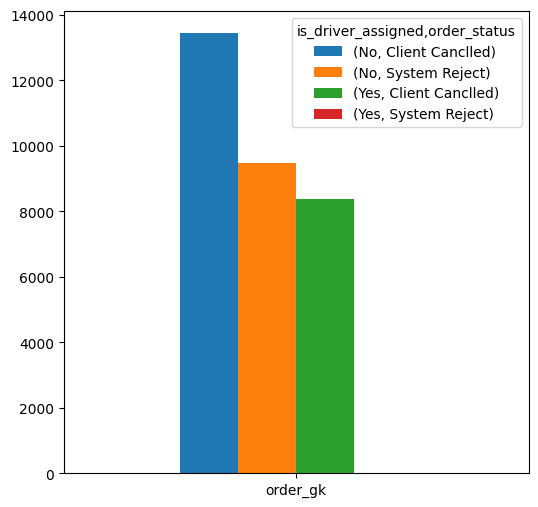

In [ ]:
# using pivot table demonstrate visualization
df_q1 = df.pivot_table(columns=['is_driver_assigned', 'order_status'], values = 'order_gk', aggfunc='count')
_ = df_q1.plot(kind='bar', subplots=False, figsize = (6,6), legend = True, rot = 0)

2) Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [ ]:
df.groupby(by=['order_time','order_status'])['order_gk'].count()

,,order_gk
order_time,order_status,
00:00:05,Client Canclled,3
00:00:11,Client Canclled,3
00:00:16,Client Canclled,8
00:00:29,System Reject,6
00:00:39,Client Canclled,4
...,...,...
23:58:43,Client Canclled,4
23:58:56,System Reject,4
23:59:05,Client Canclled,1


In [ ]:
df['order_hour'] = df['order_time'].str.split(':').apply(lambda split: split[0])

In [ ]:
df.sample(n=5, random_state = 42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,order_hour
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946,Yes,Client Canclled,21
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519,No,Client Canclled,10
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740,No,Client Canclled,09
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394,No,Client Canclled,02
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163,No,Client Canclled,21


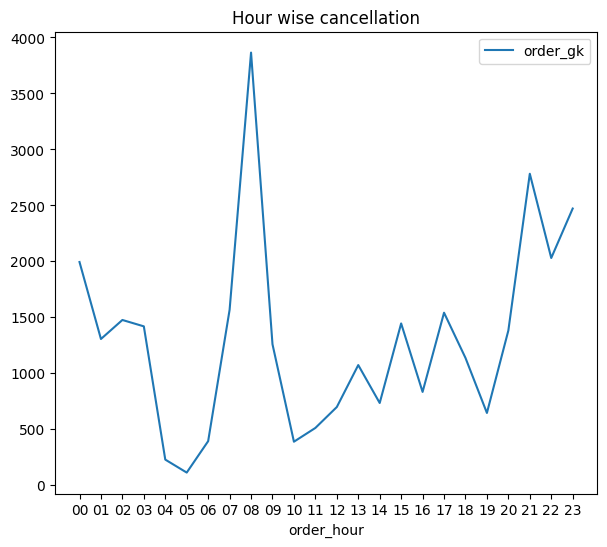

In [ ]:
_ = df.groupby(by='order_hour')['order_gk'].count().plot(figsize=(7,6),legend=True, xticks=range(0,24),title='Hour wise cancellation')

In [ ]:
group_q2 = df.groupby(by=['order_hour','is_driver_assigned','order_status'])['order_gk'].count()

In [ ]:
group_q2

order_hour  is_driver_assigned  order_status   
00          No                  Client Canclled     957
                                System Reject       706
            Yes                 Client Canclled     326
                                System Reject         4
01          No                  Client Canclled     633
                                                   ... 
22          No                  System Reject       660
            Yes                 Client Canclled     415
23          No                  Client Canclled    1144
                                System Reject       883
            Yes                 Client Canclled     444
Name: order_gk, Length: 73, dtype: int64

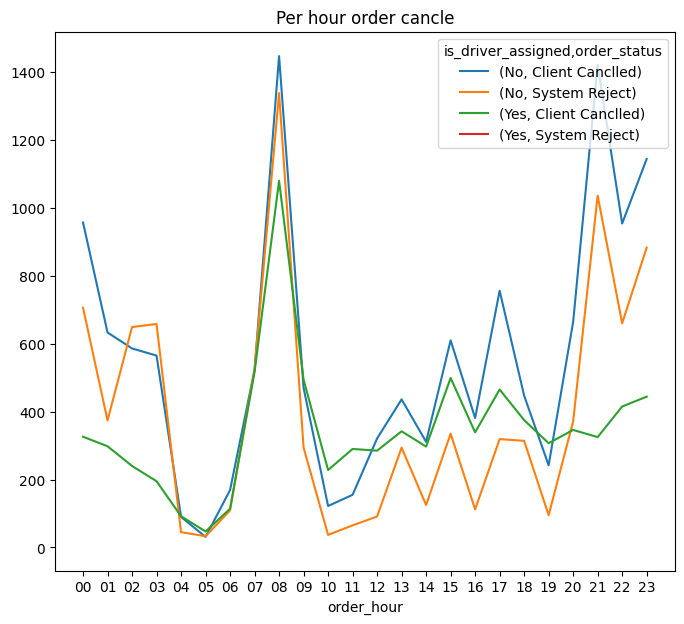

In [ ]:
_ = group_q2.reset_index().pivot(index='order_hour',columns=['is_driver_assigned','order_status'],values='order_gk').plot(xticks=range(0,24),figsize=(8,7),title='Per hour order cancle')

3) Plot the average time to cancellation with and without driver, by hour. Can we draw any conclusions from this plot?

In [ ]:
group_q3 = df.groupby(by=['order_hour','is_driver_assigned'])['cancellations_time_in_seconds'].mean()

In [ ]:
group_q3

order_hour  is_driver_assigned
00          No                    115.126437
            Yes                   276.082822
01          No                    100.593997
            Yes                   296.312081
02          No                    121.305461
            Yes                   301.466667
03          No                    129.182301
            Yes                   368.682051
04          No                    100.733333
            Yes                   245.250000
05          No                    102.838710
            Yes                   156.617021
06          No                    202.952663
            Yes                   225.508772
07          No                    141.177820
            Yes                   177.640232
08          No                    132.625432
            Yes                   172.896296
09          No                    138.014894
            Yes                   230.821862
10          No                     93.795082
            Yes                   206.447368
11          No                     93.090323
            Yes                   276.793103
12          No                    128.224299
            Yes                   243.000000
13          No                    103.577982
            Yes                   248.301170
14          No                    112.752412
            Yes                   241.367003
15          No                    140.970492
            Yes                   188.380762
16          No                    123.181102
            Yes                   217.126844
17          No                    106.842593
            Yes                   280.782796
18          No                     85.845638
            Yes                   270.277333
19          No                    103.231405
            Yes                   151.039088
20          No                    117.518072
            Yes                   214.517341
21          No                    130.828290
            Yes                   224.443077
22          No                    103.662474
            Yes                   230.720482
23          No                    117.294580
            Yes                   320.189189
Name: cancellations_time_in_seconds, dtype: float64

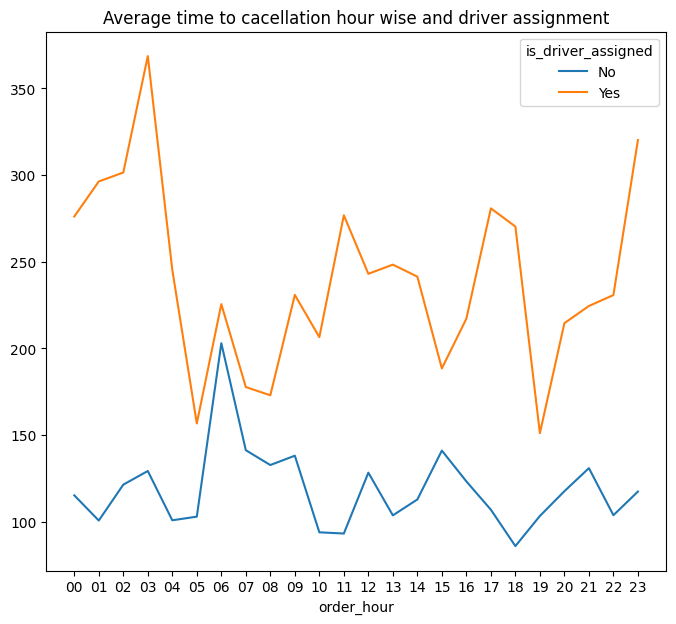

In [ ]:
_ = group_q3.reset_index().pivot(index='order_hour',columns='is_driver_assigned',values='cancellations_time_in_seconds').plot(xticks=range(0,24),figsize=(8,7),title='Average time to cacellation hour wise and driver assignment')

4) Plot the distribution of average ETA by hours. How can this plot be explained?

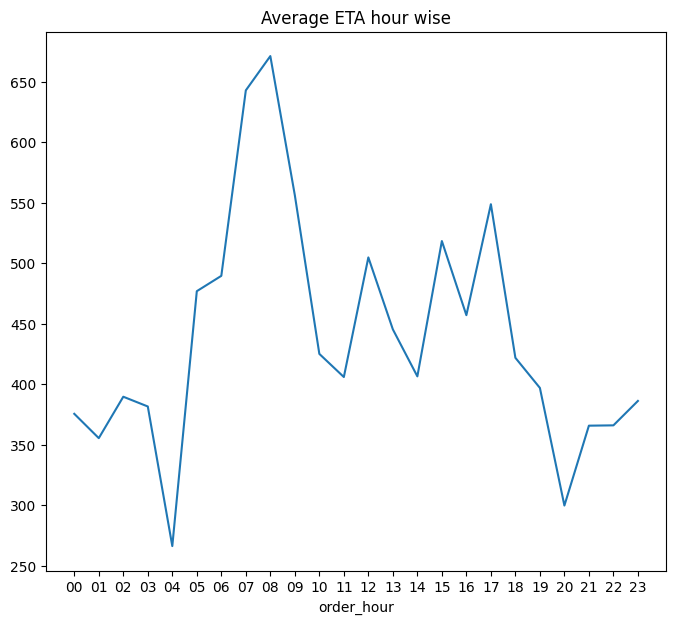

In [ ]:
group_q4 = df.groupby(by='order_hour')['m_order_eta'].mean().plot(xticks=range(0,24),figsize=(8,7),title='Average ETA hour wise')